In [1]:
# インポート
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

print('numpy version:', np.__version__)
print('tensorflow version:', tf.__version__)
print('GPU:', tf.test.gpu_device_name())

/home/yamane/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yamane/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yamane/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yamane/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
# データ読み込み関数
def loadData(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1,
                      unpack=False, dtype=str)
    speed = []
    xyzwave = []
    for row in data:
        speed.append(row[1].astype('f8'))
        xyzwave.append(row[2: 2 + 3 * 50].astype('f8'))
    speed = np.array(speed)
    x = np.array(xyzwave)
    t = speed[:, np.newaxis]
    return x, t

In [3]:
# 入力・教師データを対応させたままシャッフル
def shuffleData(x, t):
    zipped = list(zip(x, t))
    np.random.shuffle(zipped)
    x_result, t_result = zip(*zipped)
    return np.asarray(x_result), np.asarray(t_result)

In [4]:
# 学習データとテストデータに分割
def splitData(x, t):
    border = int(len(x) * 0.9)
    return (x[:border], t[:border]), (x[border:], t[border:])

In [5]:
# データの読み込み
x1, t1 = loadData('ML/data/ML/0912_1800.csv')
x2, t2 = loadData('ML/data/ML/0912_1815.csv')
x3, t3 = loadData('ML/data/ML/0925.csv')
x4, t4 = loadData('ML/data/ML/1010.csv')
x_all = np.concatenate([x1, x2, x3, x4], axis=0)
t_all = np.concatenate([t1, t2, t3, t4], axis=0)

x, t = loadData('ML/data/ML/1010.csv')

x_shuffle, t_shuffle = shuffleData(x, t)
(x_train, t_train), (x_test,  t_test) = splitData(x_shuffle, t_shuffle)

In [6]:
# モデル生成
model = keras.Sequential()
model.add(layers.Input(shape=(150,)))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense( 70, activation='tanh'))
model.add(layers.Dense( 40, activation='tanh'))
model.add(layers.Dense( 10, activation='tanh'))
model.add(layers.Dense(  1))

adam = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# モデルの訓練
result = model.fit(x_train, t_train, epochs=100)

Epoch 1/100
1171/1171 [==============================] - 0s 283us/sample - loss: 1.0533
Epoch 2/100
1171/1171 [==============================] - 0s 55us/sample - loss: 0.1317
Epoch 3/100
1171/1171 [==============================] - 0s 58us/sample - loss: 0.0881
Epoch 4/100
1171/1171 [==============================] - 0s 55us/sample - loss: 0.0772
Epoch 5/100
1171/1171 [==============================] - 0s 50us/sample - loss: 0.0679
Epoch 6/100
1171/1171 [==============================] - 0s 48us/sample - loss: 0.0616
Epoch 7/100
1171/1171 [==============================] - 0s 60us/sample - loss: 0.0563
Epoch 8/100
1171/1171 [==============================] - 0s 53us/sample - loss: 0.0473
Epoch 9/100
1171/1171 [==============================] - 0s 52us/sample - loss: 0.0403
Epoch 10/100
1171/1171 [==============================] - 0s 51us/sample - loss: 0.0339
Epoch 11/100
1171/1171 [==============================] - 0s 50us/sample - loss: 0.0283
Epoch 12/100
1171/1171 [================

In [8]:
# 学習データでテスト
y_train = model.predict(x_train)
error_train = np.abs(t_train - y_train)

# テストデータでテスト
y_test = model.predict(x_test)
error_test  = np.abs(t_test - y_test)

In [9]:
# 誤差率表示
errorRate_train = np.average(error_train) / np.average(t_train) * 100
errorRate_test  = np.average(error_test ) / np.average(t_test) * 100
print('error_train_average = {} [%]'.format(errorRate_train))
print('error_test_average  = {} [%]'.format(errorRate_test))

error_train_average = 1.558606396848067 [%]
error_test_average  = 5.397249860825327 [%]


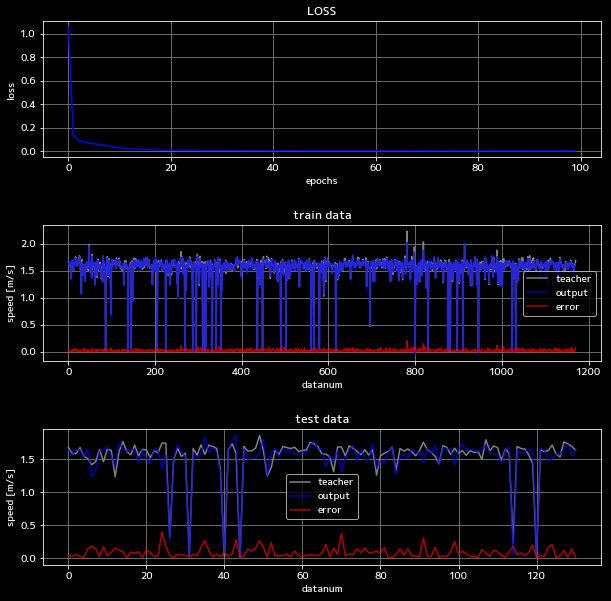

In [13]:
# グラフ表示
import matplotlib.pyplot as plt

# matplotlib設定
plt.rcParams['font.family'] = ['Yu Gothic', 'Corporate Logo Medium']

fig, axes = plt.subplots(3, 1, figsize=(10,10))

axes[0].set_title('LOSS')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('loss')
axes[0].plot(result.history['loss'], color='blue')
axes[0].grid(color='gray')

axes[1].set_title('train data')
axes[1].set_xlabel('datanum')
axes[1].set_ylabel('speed [m/s]')
axes[1].plot(t_train, label='teacher', color='gray')
axes[1].plot(y_train, label='output', color='blue', alpha=0.7)
axes[1].plot(error_train, label='error', color='red', alpha=0.7)
axes[1].legend()
axes[1].grid(color='gray')

axes[2].set_title('test data')
axes[2].set_xlabel('datanum')
axes[2].set_ylabel('speed [m/s]')
axes[2].plot(t_test, label='teacher', color='gray')
axes[2].plot(y_test, label='output', color='blue', alpha=0.7)
axes[2].plot(error_test, label='error', color='red', alpha=0.7)
axes[2].legend()
axes[2].grid(color='gray')

# 日本語化
# axes[0].set_title('損失関数')
# axes[1].set_title('学習データ')
# axes[2].set_title('テストデータ')

plt.subplots_adjust(hspace=0.5)
fig.show()
fig.savefig('ML/graph/graph.png')